# Importing Library

In [ ]:

import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive


In [ ]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [ ]:
train_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
val_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/test"


# Data Management

## Data Dwonloading

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown


In [ ]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

## Dataset Loading

In [ ]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode="rgb",
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6799 files belonging to 3 classes.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2278 files belonging to 3 classes.


In [ ]:
for image,label in train_dataset.take(1):
  print(image[5].numpy())
  print(label[5].numpy())

[[[141.       141.       141.      ]
  [139.375    139.375    139.375   ]
  [136.9375   136.9375   136.9375  ]
  ...
  [111.625    111.625    111.625   ]
  [109.625    109.625    109.625   ]
  [ 95.        95.        95.      ]]

 [[140.1875   140.1875   140.1875  ]
  [139.88281  139.88281  139.88281 ]
  [139.42578  139.42578  139.42578 ]
  ...
  [108.07031  108.07031  108.07031 ]
  [101.296875 101.296875 101.296875]
  [ 99.875     99.875     99.875   ]]

 [[140.       140.       140.      ]
  [140.5586   140.5586   140.5586  ]
  [141.16016  141.16016  141.16016 ]
  ...
  [102.953125 102.953125 102.953125]
  [100.36328  100.36328  100.36328 ]
  [100.3125   100.3125   100.3125  ]]

 ...

 [[190.       190.       190.      ]
  [188.6289   188.6289   188.6289  ]
  [189.21484  189.21484  189.21484 ]
  ...
  [198.       198.       198.      ]
  [198.       198.       198.      ]
  [198.       198.       198.      ]]

 [[189.625    189.625    189.625   ]
  [189.42188  189.42188  189.42188 ]


## Dataset Visulaization

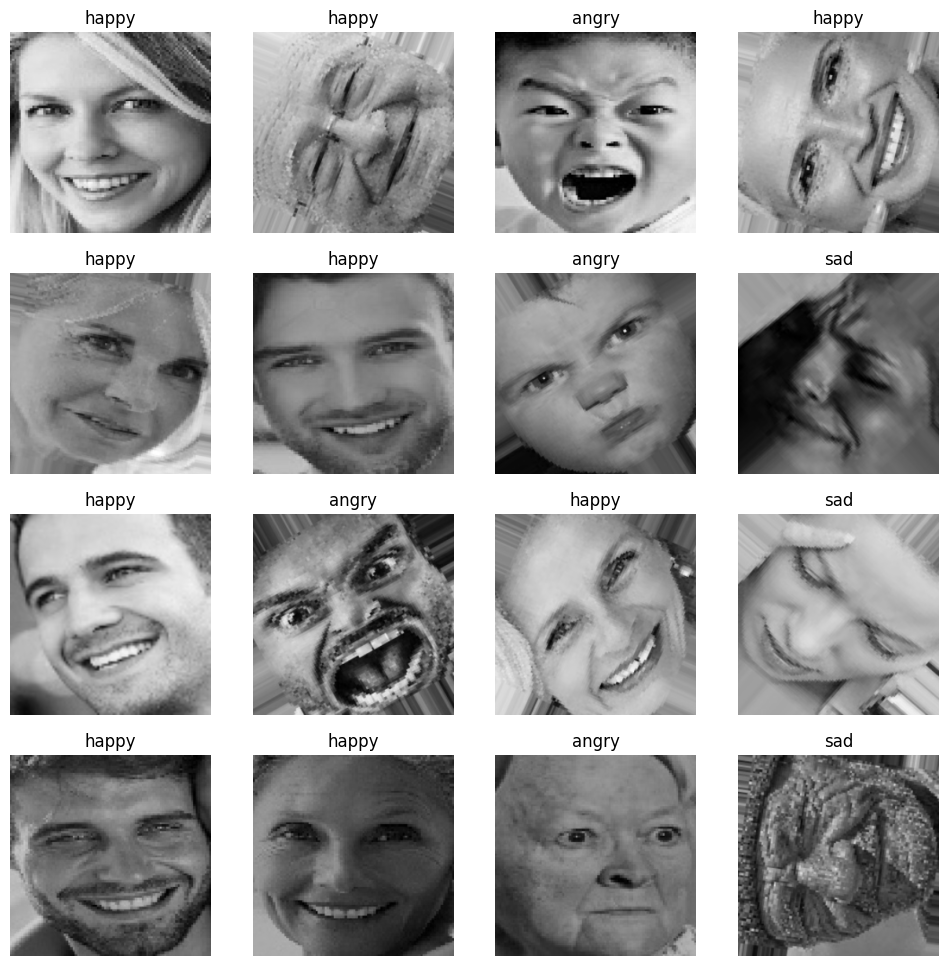

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in train_dataset.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i],axis=0).numpy()])
    plt.axis("off")

## Data Augmentation

In [ ]:
augment_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
def augment_layer(image,label):
  return augment_layers(image,training=True),label

In [ ]:
training_dataset=(
    train_dataset
    .map(augment_layer,num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
validation_dataset=(
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
resize_rescale_layers=tf.keras.Sequential([
    tf.keras.layers.Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    tf.keras.layers.Rescaling(1./255),
])

In [ ]:
training_dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

# Modeling

## Lenet Model

In [ ]:
from tensorflow.keras.regularizers import L2 # Import L2 regularizer

lenet_model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(None,None,3)),
        resize_rescale_layers,

        tf.keras.layers.Conv2D(filters=CONFIGURATION["N_FILTERS"],kernel_size=CONFIGURATION["KERNEL_SIZE"], # Corrected typo: 'kernal_size' to 'kernel_size'
                               strides=CONFIGURATION["N_STRIDES"],padding='valid',activation="relu",
                               kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"],strides=CONFIGURATION["N_STRIDES"]*2),
        tf.keras.layers.Dropout(CONFIGURATION["DROPOUT_RATE"]),


        tf.keras.layers.Conv2D(filters=CONFIGURATION["N_FILTERS"]*2+4,kernel_size=CONFIGURATION["KERNEL_SIZE"], # Corrected typo: 'kernal_size' to 'kernel_size'
                               strides=CONFIGURATION["N_STRIDES"],padding='valid',activation="relu",
                               kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"],strides=CONFIGURATION["N_STRIDES"]*2),


        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(CONFIGURATION["N_DENSE_1"],activation="relu",
                              kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(CONFIGURATION["DROPOUT_RATE"]),

        tf.keras.layers.Dense(CONFIGURATION["N_DENSE_2"],activation="relu",
                              kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(CONFIGURATION["NUM_CLASSES"],activation="softmax"),
    ]

)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


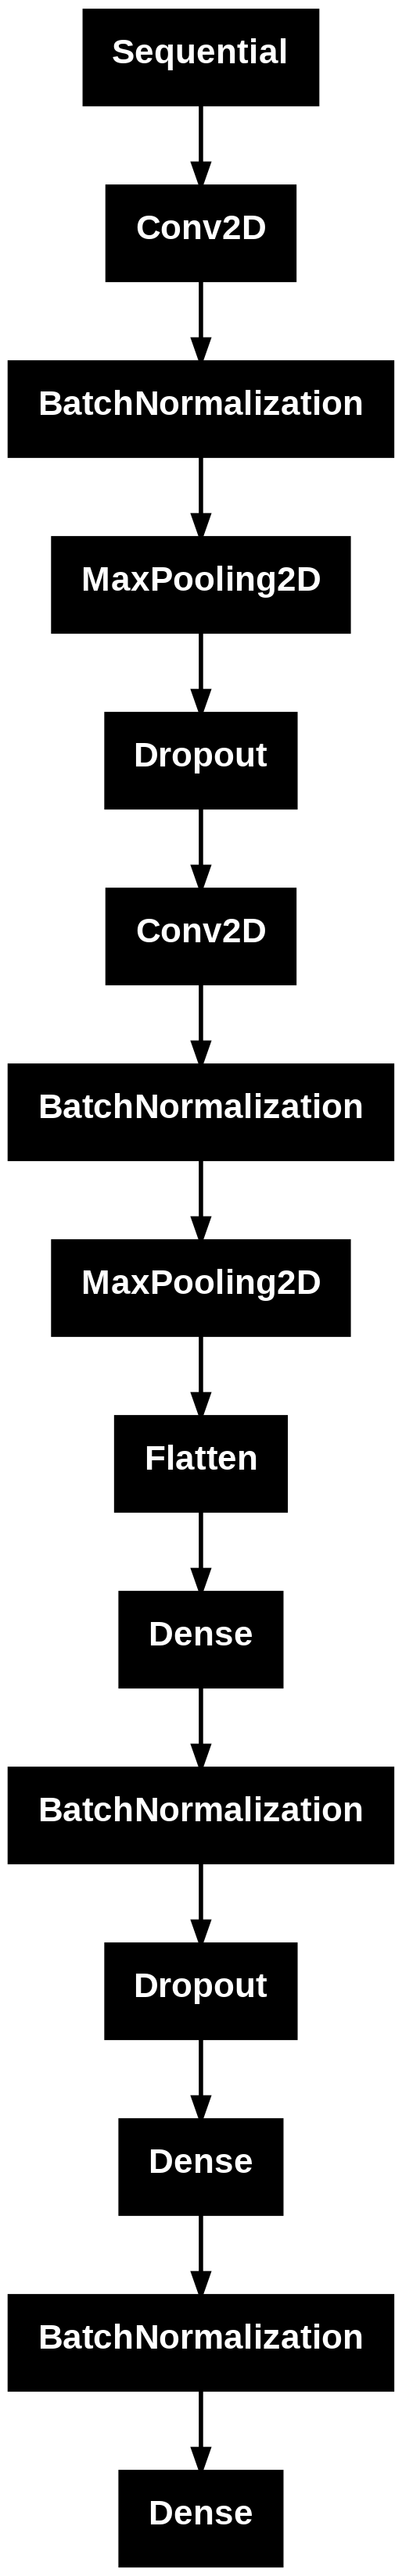

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(lenet_model)

In [ ]:
lenet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      62,981,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

## Training
### Lenet Model

In [ ]:
n_sample_0=1525 #angry
n_sample_1=3019 #happy
n_sample_2=2255 #sad

In [ ]:
class_weights = {0:6799/n_sample_0, 1: 6799/n_sample_1, 2: 6799/n_sample_2}
print(class_weights)

{0: 4.458360655737705, 1: 2.2520702219277906, 2: 3.015077605321508}


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=3, min_lr=1e-6)

In [ ]:
checkpoint_callback=ModelCheckpoint(
    'Lenet_best_weights.keras',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
)

In [ ]:
loss_function=CategoricalCrossentropy()

In [ ]:
metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]


In [ ]:
lenet_model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,
  metrics = metrics,
)

In [ ]:
history = lenet_model.fit(
    training_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback,reduce_lr], # Add the lr_callback here
    class_weight=class_weights, #adding class weights to handle imabalanced dataset
    verbose=1,

)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.4413 - loss: 3.8964 - top_k_accuracy: 0.7496
Epoch 1: val_accuracy improved from -inf to 0.43547, saving model to Lenet_best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 109s 464ms/step - accuracy: 0.4414 - loss: 3.8938 - top_k_accuracy: 0.7497 - val_accuracy: 0.4355 - val_loss: 1.0922 - val_top_k_accuracy: 0.6708 - learning_rate: 0.0010
Epoch 2/20
212/213 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5159 - loss: 3.0158 - top_k_accuracy: 0.8076
Epoch 2: val_accuracy improved from 0.43547 to 0.51141, saving model to Lenet_best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 134s 457ms/step - accuracy: 0.5158 - loss: 3.0161 - top_k_accuracy: 0.8075 - val_accuracy: 0.5114 - val_loss: 0.9888 - val_top_k_accuracy: 0.8161 - learning_rate: 0.0010
Epoch 3/20
212/213 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5227 - loss: 2.9686 - top_k_accuracy: 0.8064
Epoch 3: val_accuracy improved from 0.51141 to 0.55136, saving model to 

In [ ]:
# Load the best model (architecture + weights)
best_model = tf.keras.models.load_model("Lenet_best_weights.keras")

In [ ]:
lenet_loss,lenet_accuracy,lenet_topK=best_model.evaluate(validation_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6717 - loss: 0.7536 - top_k_accuracy: 0.8913


In [ ]:
print(f"Test Accuracy: {lenet_accuracy * 100:.2f}%")


Test Accuracy: 67.16%


In [ ]:
test_image=cv2.imread("/content/dataset/EmotionsDataset_Splitted/data/train/happy/214.jpg")
test_image=cv2.resize(test_image,(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]))
im=tf.constant(test_image,dtype=tf.float32)

im=tf.expand_dims(im,axis=0)
print(lenet_model(im))
print(CONFIGURATION["CLASS_NAMES"][tf.argmax(lenet_model(im),axis=-1).numpy()[0]])

tf.Tensor([[0.36813143 0.16934049 0.4625281 ]], shape=(1, 3), dtype=float32)
sad


In [ ]:
lenet_model(im)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.36813143, 0.16934049, 0.4625281 ]], dtype=float32)>

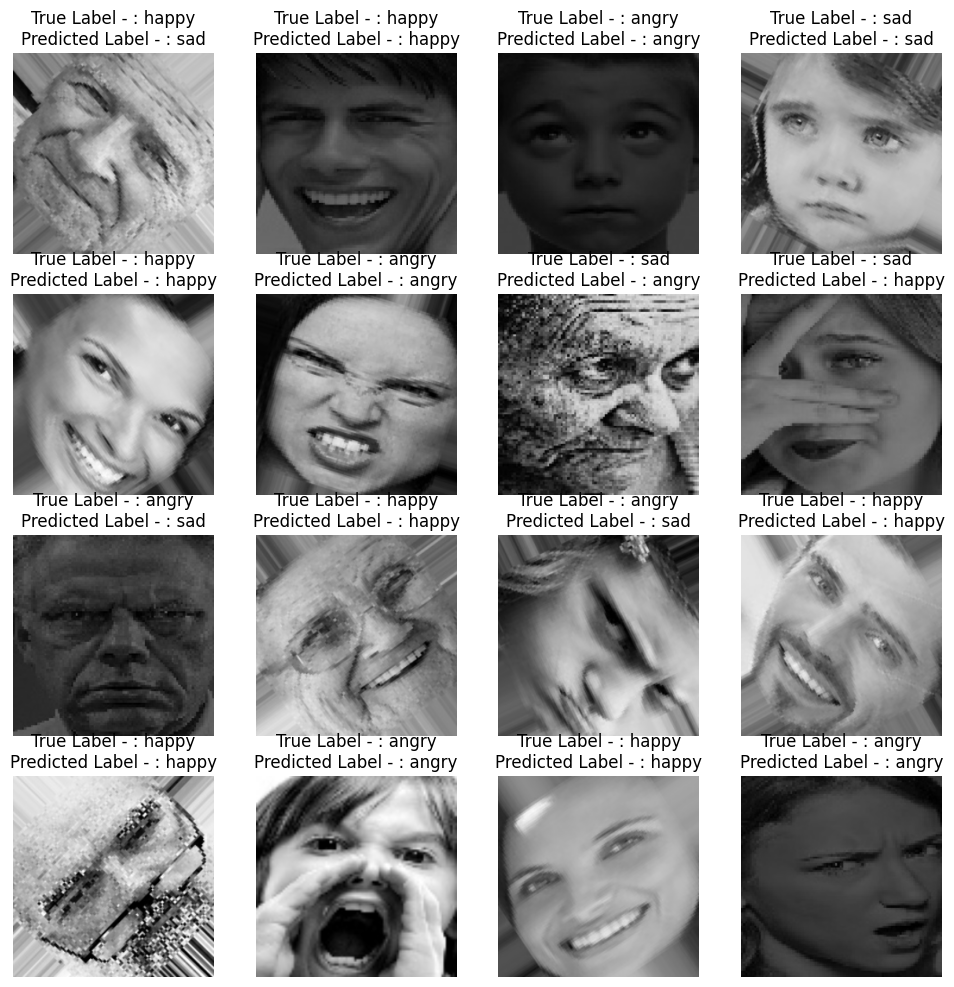

In [ ]:

plt.figure(figsize = (12,12))

for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted Label - : "
              + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

In [ ]:
predicted=[]
labels=[]

for im,label in validation_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())



print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[1 0 1 ... 2 2 2]
[2 1 0 ... 2 2 2]


In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[298  77 140]
 [ 85 709 212]
 [111 131 515]]


Text(0.5, 58.7222222222222, 'Predicted')

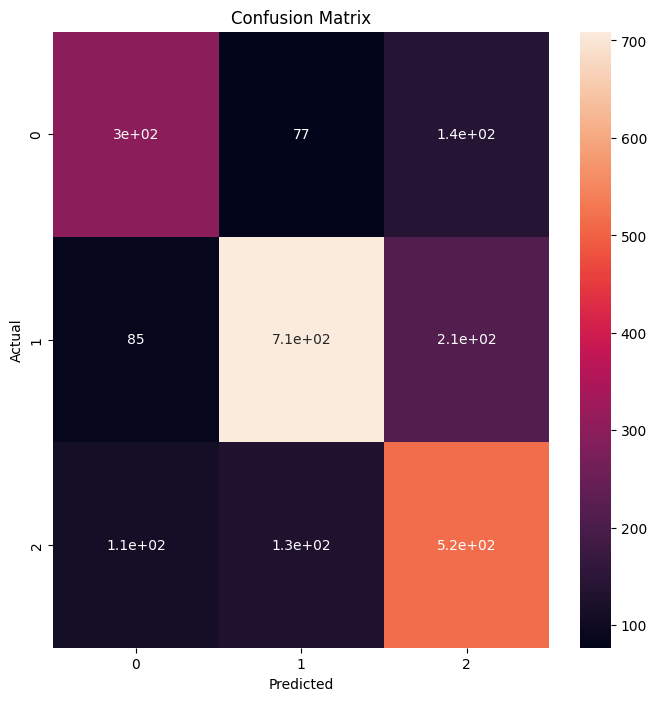

In [ ]:
cm=confusion_matrix(lab,pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

## ResNet34

In [ ]:
## Custom Conv2D

class CustomConv2D(Layer):
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    self.conv = Conv2D(
        filters = n_filters,
        kernel_size = kernel_size,
        activation = 'relu',
        strides = n_strides,
        padding = padding)

    self.batch_norm = BatchNormalization()

  def call(self, x, training = True):

    x = self.conv(x)
    x = self.batch_norm(x, training=training)

    return x

In [ ]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = "same")
    self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = "same")

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)

  def call(self, input, training):

    x = self.custom_conv_1(input, training)
    x = self.custom_conv_2(x, training)

    if self.dotted:
      x_add = self.custom_conv_3(input, training)
      x_add = Add()([x, x_add])
    else:
      x_add = Add()([x, input])

    return self.activation(x_add)


In [ ]:
## complete network

class ResNet34(Model):
  def __init__(self,):
    super(ResNet34, self).__init__(name = 'resnet_34')

    self.conv_1 = CustomConv2D(64, 7, 2, padding = 'same')
    self.max_pool = MaxPooling2D(3,2)

    self.conv_2_1 = ResidualBlock(64)
    self.conv_2_2 = ResidualBlock(64)
    self.conv_2_3 = ResidualBlock(64)

    self.conv_3_1 = ResidualBlock(128, 2)
    self.conv_3_2 = ResidualBlock(128)
    self.conv_3_3 = ResidualBlock(128)
    self.conv_3_4 = ResidualBlock(128)

    self.conv_4_1 = ResidualBlock(256, 2)
    self.conv_4_2 = ResidualBlock(256)
    self.conv_4_3 = ResidualBlock(256)
    self.conv_4_4 = ResidualBlock(256)
    self.conv_4_5 = ResidualBlock(256)
    self.conv_4_6 = ResidualBlock(256)

    self.conv_5_1 = ResidualBlock(512, 2)
    self.conv_5_2 = ResidualBlock(512)
    self.conv_5_3 = ResidualBlock(512)

    self.global_pool = GlobalAveragePooling2D()

    self.fc_3 = Dense(CONFIGURATION["NUM_CLASSES"], activation = 'softmax')

  def call(self, x, training = True):
    x = self.conv_1(x)
    x = self.max_pool(x)

    x = self.conv_2_1(x, training)
    x = self.conv_2_2(x, training)
    x = self.conv_2_3(x, training)

    x = self.conv_3_1(x, training)
    x = self.conv_3_2(x, training)
    x = self.conv_3_3(x, training)
    x = self.conv_3_4(x, training)

    x = self.conv_4_1(x, training)
    x = self.conv_4_2(x, training)
    x = self.conv_4_3(x, training)
    x = self.conv_4_4(x, training)
    x = self.conv_4_5(x, training)
    x = self.conv_4_6(x, training)

    x = self.conv_5_1(x, training)
    x = self.conv_5_2(x, training)
    x = self.conv_5_3(x, training)

    x = self.global_pool(x)

    return self.fc_3(x)

In [ ]:

resnet_34 = ResNet34()
resnet_34(tf.zeros([1,256,256,3]),training=False)
resnet_34.summary()

ValueError: Exception encountered when calling ResNet34.call().

[1mOnly input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: False (of type <class 'bool'>)[0m

Arguments received by ResNet34.call():
  • x=tf.Tensor(shape=(1, 256, 256, 3), dtype=float32)
  • training=False

## Transfer Learning with EfficientNet

In [ ]:
backbone=tf.keras.applications.efficientnet.EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"],3),

)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
backbone.trainiable=False

In [ ]:
EfficienNetB4_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
EfficienNetB4_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,836,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 19,518,283 (74.46 MB)

 Non-trainable params: 127,255 (497.09 KB)

In [ ]:
checkpoint_callback=ModelCheckpoint(
    'EfficientNetB4_best_weights.keras',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
)

In [ ]:
EfficienNetB4_model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,
  metrics = metrics,
)

In [ ]:
history = EfficienNetB4_model.fit(
    training_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback,reduce_lr], # Add the lr_callback here
    class_weight=class_weights, #adding class weights to handle imabalanced dataset
    verbose=1,

)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.5764 - loss: 3.6900 - top_k_accuracy: 0.8268
Epoch 1: val_accuracy improved from -inf to 0.61721, saving model to EfficientNetB4_best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.5767 - loss: 3.6862 - top_k_accuracy: 0.8270 - val_accuracy: 0.6172 - val_loss: 3.3722 - val_top_k_accuracy: 0.8090 - learning_rate: 0.0010
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.5714 - loss: 3.5348 - top_k_accuracy: 0.8288
Epoch 2: val_accuracy did not improve from 0.61721
213/213 ━━━━━━━━━━━━━━━━━━━━ 121s 565ms/step - accuracy: 0.5714 - loss: 3.5343 - top_k_accuracy: 0.8288 - val_accuracy: 0.3762 - val_loss: 5.4966 - val_top_k_accuracy: 0.6062 - learning_rate: 0.0010
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.6344 - loss: 2.7672 - top_k_accuracy: 0.8623
Epoch 3: val_accuracy improved from 0.61721 to 0.72169, saving model to EfficientNetB4_best_weights.keras
213/21

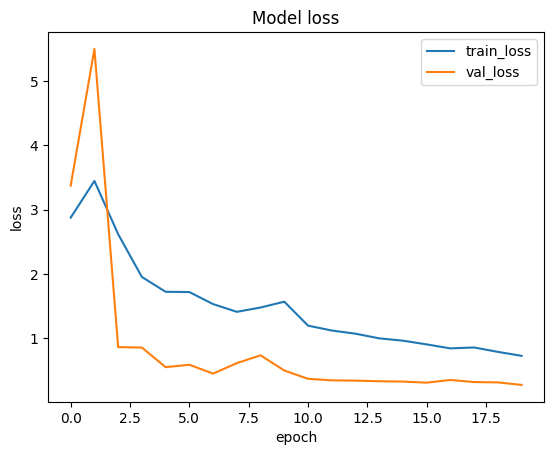

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

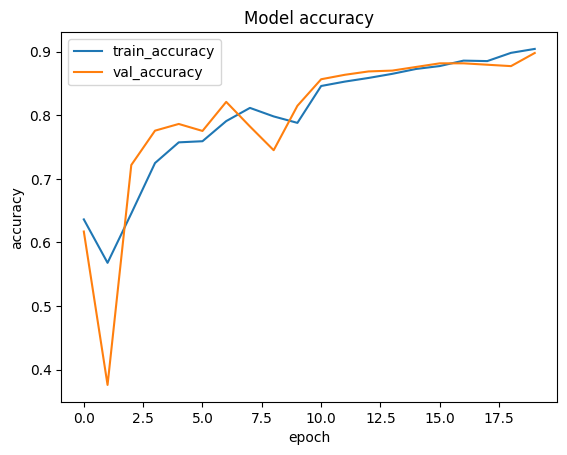

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# Load the best model (architecture + weights)
best_model = tf.keras.models.load_model("EfficientNetB4_best_weights.keras")

In [ ]:
EfficientNet_loss,EfficientNet_accuracy,EfficientNet_topK=best_model.evaluate(validation_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 177ms/step - accuracy: 0.8940 - loss: 0.2738 - top_k_accuracy: 0.9646


In [ ]:
print(f"Test Accuracy: {EfficientNet_accuracy * 100:.2f}%")

Test Accuracy: 89.77%


In [ ]:
test_image=cv2.imread("/content/dataset/EmotionsDataset_Splitted/data/train/happy/214.jpg")
test_image=cv2.resize(test_image,(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]))
im=tf.constant(test_image,dtype=tf.float32)

im=tf.expand_dims(im,axis=0)
print(best_model(im))
print(CONFIGURATION["CLASS_NAMES"][tf.argmax(best_model(im),axis=-1).numpy()[0]])

tf.Tensor([[1. 0. 0.]], shape=(1, 3), dtype=float32)
angry


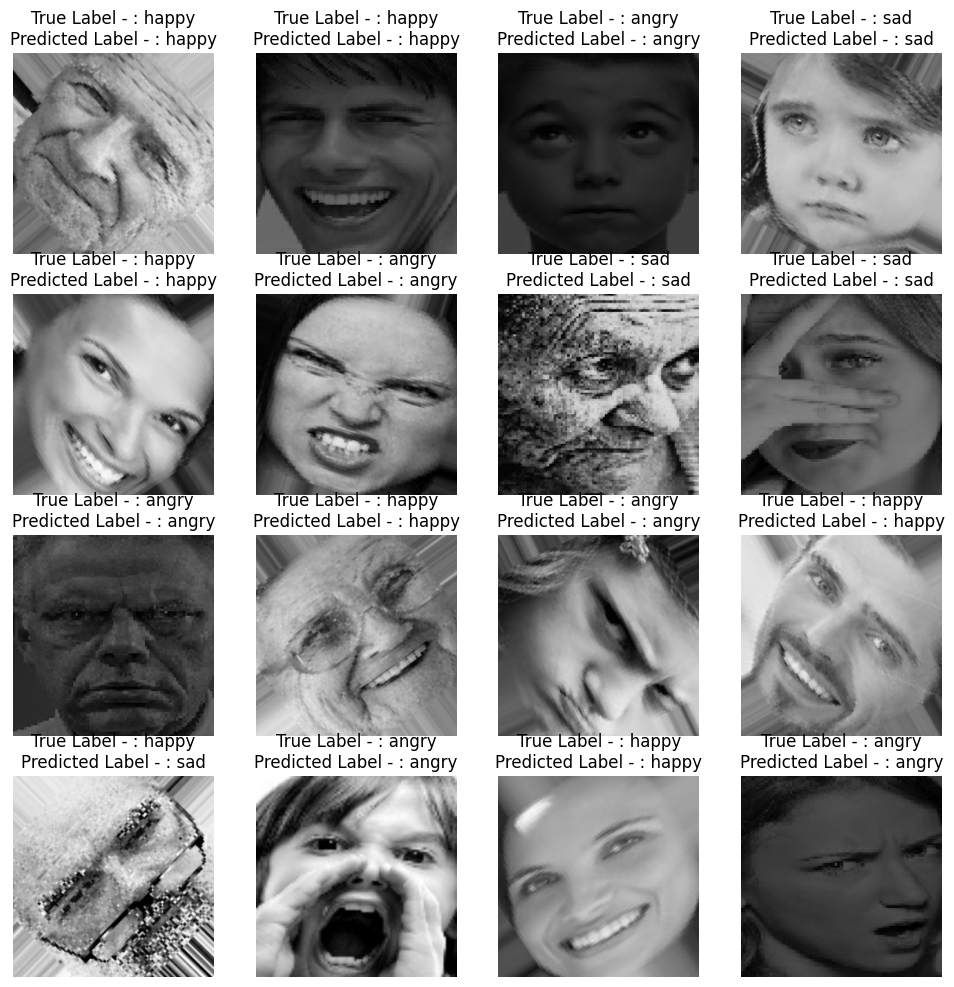

In [ ]:

plt.figure(figsize = (12,12))

for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted Label - : "
              + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(best_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

In [ ]:
predicted=[]
labels=[]

for im,label in validation_dataset:
  predicted.append(best_model(im))
  labels.append(label.numpy())



print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[1 0 1 ... 2 2 2]
[1 0 1 ... 2 2 2]


In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[440  21  54]
 [ 32 924  50]
 [ 28  48 681]]


Text(0.5, 58.7222222222222, 'Predicted')

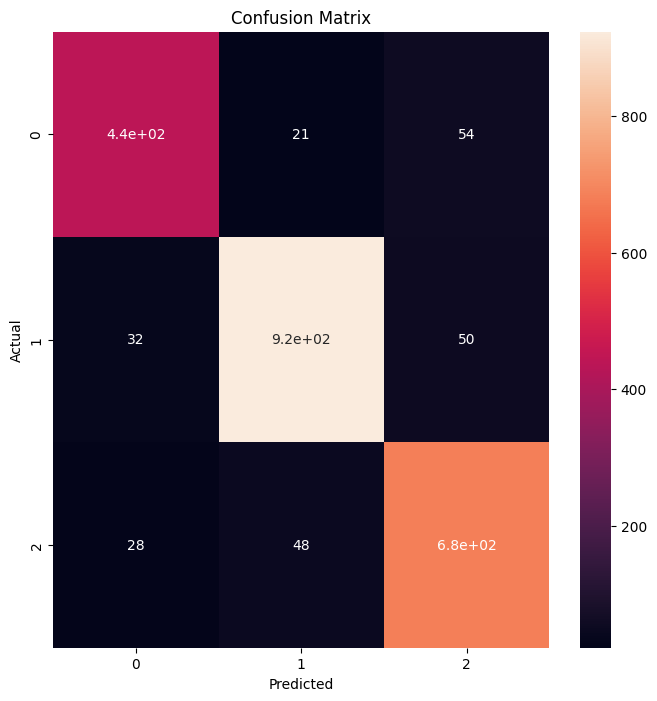

In [ ]:
cm=confusion_matrix(lab,pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Transfer Learning with MobileNetV2

In [ ]:
backbone=tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"],3),
)

<ipython-input-42-b7c18cc154ab>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  backbone=tf.keras.applications.mobilenet_v2.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
backbone.trainable=False

In [ ]:
MobileNetV2_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
MobileNetV2_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,411 (14.14 MB)

 Trainable params: 1,445,379 (5.51 MB)

 Non-trainable params: 2,260,032 (8.62 MB)

In [ ]:
checkpoint_callback=ModelCheckpoint(
    'MoblieNetV2_best_weights.keras',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
)

In [ ]:
loss_function=CategoricalCrossentropy()

In [ ]:
metrics=[CategoricalAccuracy(name="accuracy"),TopKCategoricalAccuracy(k=2,name='top_k_accuracy')]

In [ ]:
MobileNetV2_model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
    loss=loss_function,
    metrics=metrics,
)

In [ ]:
history = MobileNetV2_model.fit(
    training_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback,reduce_lr], # Add the lr_callback here
    class_weight=class_weights, #adding class weights to handle imabalanced dataset
    verbose=1,

)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.4701 - loss: 3.9639 - top_k_accuracy: 0.7790
Epoch 1: val_accuracy improved from -inf to 0.44908, saving model to MoblieNetV2_best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 122s 497ms/step - accuracy: 0.4703 - loss: 3.9617 - top_k_accuracy: 0.7791 - val_accuracy: 0.4491 - val_loss: 1.1952 - val_top_k_accuracy: 0.7643 - learning_rate: 0.0010
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5466 - loss: 3.0208 - top_k_accuracy: 0.8264
Epoch 2: val_accuracy improved from 0.44908 to 0.53687, saving model to MoblieNetV2_best_weights.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 95s 443ms/step - accuracy: 0.5466 - loss: 3.0206 - top_k_accuracy: 0.8264 - val_accuracy: 0.5369 - val_loss: 0.9704 - val_top_k_accuracy: 0.8121 - learning_rate: 0.0010
Epoch 3/20
212/213 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5581 - loss: 2.8800 - top_k_accuracy: 0.8327
Epoch 3: val_accuracy improved from 0.53687 to 0.59394, savin